In [104]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import os
import time
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import re
import seaborn as sns
from collections import Counter

In [509]:
def plot_similarity(labels, features, rotation):
  corr = np.inner(features, features)
  sns.set(font_scale=1.2)
  g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0.4,
      vmax=1,
      cmap="YlOrRd")
  g.set_xticklabels(labels, rotation=rotation)
  g.set_title("Semantic Textual Similarity")


def run_and_plot(session_, input_tensor_, messages_, encoding_tensor):
  message_embeddings_ = session_.run(
      encoding_tensor, feed_dict={input_tensor_: messages_})
  plot_similarity(messages_, message_embeddings_, 90)
    
def calc_gender(idx):
    indices = [i for i, x in enumerate(list(labs)) if x == idx]
    gender_loc = [gender[i] for i in indices]
    print("index: {} {}".format(idx, Counter(gender_loc)))
    
def calc_age(idx):
    indices = [i for i, x in enumerate(list(labs)) if x == idx]
    age_loc = [age[i] for i in indices]
    age_int = [int(x) for x in age_loc if type(x) == str and x != "NA"]
    print("index: {} {}".format(idx, np.mean(age_int)))
    
def make_dataframe(idx, name):
    if idx is not None:
        indices = [i for i, x in enumerate(list(labs)) if x == idx]
    else:
        indices = [i for i, x in enumerate(list(labs))]
    age_loc = [age[i] for i in indices]
    age_all = [int(x) for x in age_loc if type(x) == str and x != "NA"]
    col_name = [name] * len(age_all)
    df_1 = pd.DataFrame(data = age_all, columns = ["age"])
    df_1['name'] = col_name
    return(df_1)

In [2]:
embed = hub.Module("https://tfhub.dev/google/universal-sentence-encoder/2")

INFO:tensorflow:Using /var/folders/m5/_p_tp0v535z7k52m4qjcff6h0000gn/T/tfhub_modules to cache modules.
INFO:tensorflow:Downloading TF-Hub Module 'https://tfhub.dev/google/universal-sentence-encoder/2'.
INFO:tensorflow:Downloaded TF-Hub Module 'https://tfhub.dev/google/universal-sentence-encoder/2'.


In [328]:
data_en = "../../data/processed/english_corrected.txt"
print("### Opening tweets ### \n")
tweets = []
for line in open(data_en):
    tweets.append(str.strip(line))
    
gen_file = "../../data/processed/gender.txt"
print("### Opening gender ### \n")
gender = []
for line in open(gen_file):
    gender.append(str.strip(line))
    
age_file = "../../data/processed/age.txt"
age = []
for line in open(age_file):
    age.append(str.strip(line))

### Opening tweets ### 

### Opening gender ### 



In [37]:
# Reduce logging output.
tf.logging.set_verbosity(tf.logging.ERROR)
start_time = time.time()
with tf.Session() as session:
  session.run([tf.global_variables_initializer(), tf.tables_initializer()])
  message_embeddings = session.run(embed(tweets))
print("--- %s seconds ---" % (time.time() - start_time))

--- 277.93146300315857 seconds ---


In [43]:
clusts = KMeans(n_clusters = 200).fit(message_embeddings)
labs = clusts.labels_

/Users/johnbrandt/anaconda3/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


In [520]:
np.savetxt("../../data/processed/labs.txt", labs.astype(int), fmt='%i')

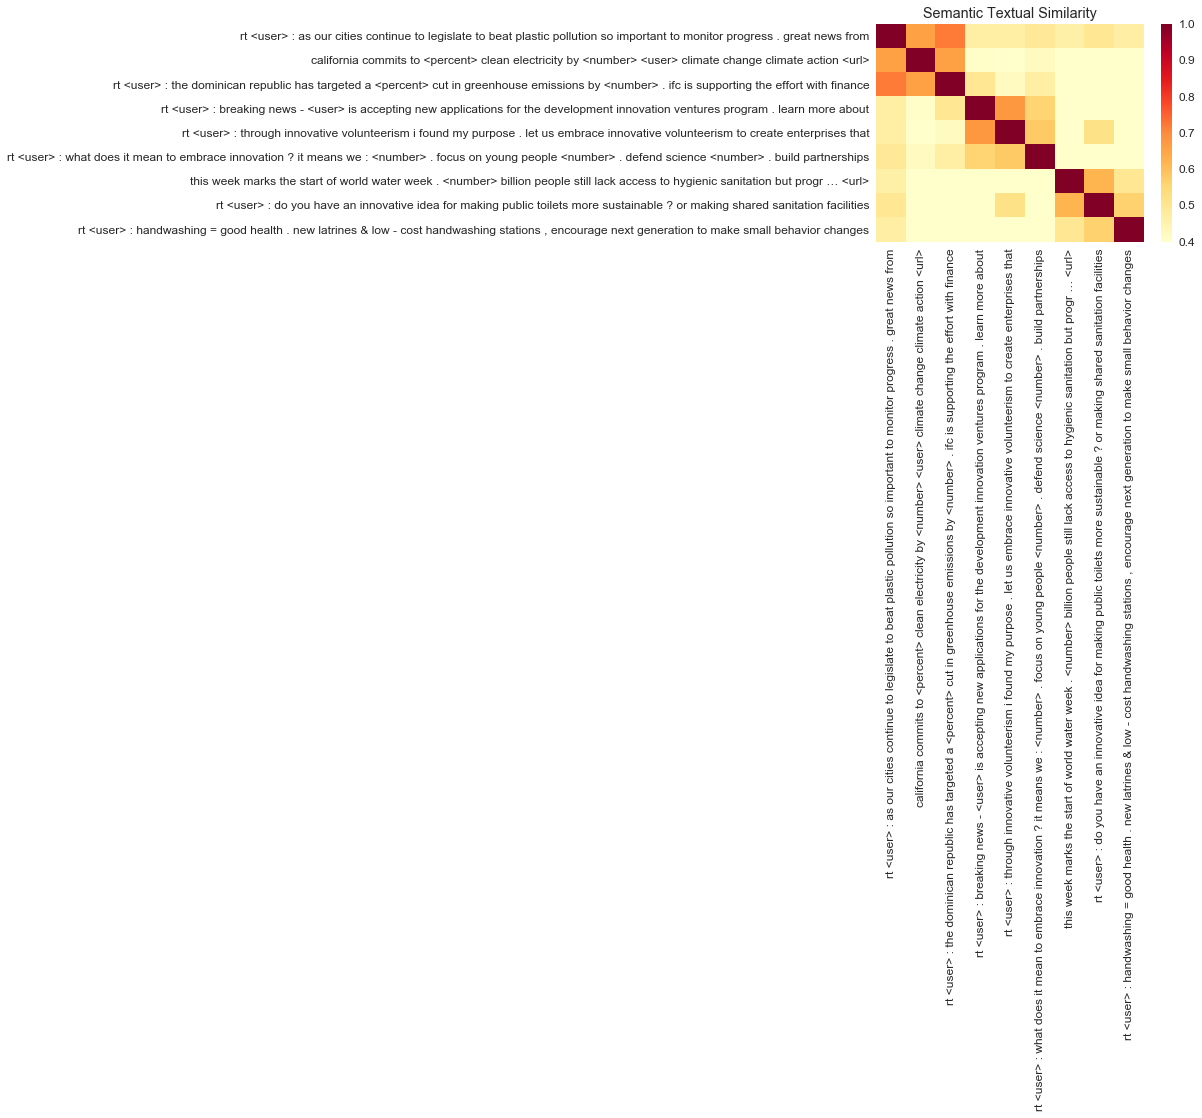

In [515]:
indices_lit = [i for i, x in enumerate(list(labs)) if x == 161]
indices_lit = [indices_lit[i] for i in (0,1,5)]
indices_inn = [i for i, x in enumerate(list(labs)) if x == 75]
indices_inn = [indices_inn[i] for i in (0,1,4)]
indices_water = [i for i, x in enumerate(list(labs)) if x == 37]
indices_water = [indices_water[i] for i in (2,1,5)]
ind = [indices_lit, indices_inn, indices_water]
ind = [item for sublist in ind for item in sublist]

similarity_input_placeholder = tf.placeholder(tf.string, shape=(None))
similarity_message_encodings = embed(similarity_input_placeholder)
with tf.Session() as session:
  session.run(tf.global_variables_initializer())
  session.run(tf.tables_initializer())
  run_and_plot(session, similarity_input_placeholder, [tweets[i] for i in ind],
               similarity_message_encodings)

In [483]:
indices = [i for i, x in enumerate(list(labs)) if x == 172]

In [484]:
[tweets[i] for i in indices]

['rt <user> : what africa does with agriculture will determine future of food globally – <user> <url>',
 'rt <user> : by <number> , the global population is set to rise to over <number> billion . it ’ s time to stop talking about population growth and take',
 'rt <user> : globally , <number> billion people will continue to use traditional cooking methods in <number> if the current trajectory continues .',
 "rt <user> : our chocolate supplies are under threat . ghana is the world ' s second biggest cocoa producer - but its trees are dying .",
 'rt <user> : what africa does with agriculture will determine future of food globally – <user> <url>',
 'in the coming decades , africa ’ s food system will be further strained by a population that is projected to rise by … <url>',
 'rt <user> : africa could replace these imports with their own produce , which would in turn reduce poverty , enhance food and nutrition',
 'rt <user> : in the coming decades , africa ’ s food system will be further st

In [302]:
for i in range(0, 200):
    calc_gender(i)

index: 0 Counter({'NA': 705, 'male': 55, '': 31, 'female': 28})
index: 1 Counter({'NA': 1401, 'male': 86, '': 75, 'female': 45})
index: 2 Counter({'NA': 1182, 'male': 80, '': 53, 'female': 30})
index: 3 Counter({'NA': 1291, 'female': 143, 'male': 85, '': 72})
index: 4 Counter({'NA': 1085, 'male': 51, '': 36, 'female': 21})
index: 5 Counter({'NA': 1031, 'male': 124, '': 108, 'female': 89})
index: 6 Counter({'NA': 642, 'male': 105, 'female': 74, '': 44})
index: 7 Counter({'NA': 278})
index: 8 Counter({'NA': 681, 'male': 79, 'female': 54, '': 36})
index: 9 Counter({'NA': 857, '': 50, 'male': 41, 'female': 31})
index: 10 Counter({'NA': 1546, 'female': 50, '': 33, 'male': 32})
index: 11 Counter({'NA': 1265, 'female': 86, '': 84, 'male': 43})
index: 12 Counter({'NA': 1101, 'male': 62, '': 57, 'female': 57})
index: 13 Counter({'NA': 1323, 'male': 37, '': 28, 'female': 18})
index: 14 Counter({'NA': 1263, 'male': 96, 'female': 66, '': 63})
index: 15 Counter({'NA': 1125, 'male': 57, '': 44, 'fem

index: 131 Counter({'NA': 1492, '': 73, 'male': 56, 'female': 39})
index: 132 Counter({'NA': 503, 'male': 17, '': 16, 'female': 13})
index: 133 Counter({'NA': 771, 'male': 28, '': 26, 'female': 13})
index: 134 Counter({'NA': 1407, 'male': 110, '': 95, 'female': 63})
index: 135 Counter({'NA': 1331, 'male': 28, 'female': 20, '': 18})
index: 136 Counter({'NA': 574, 'female': 40, 'male': 26, '': 21})
index: 137 Counter({'NA': 963, 'male': 57, '': 43, 'female': 36})
index: 138 Counter({'NA': 969, 'male': 45, '': 32, 'female': 30})
index: 139 Counter({'NA': 404, 'female': 26, 'male': 21, '': 11})
index: 140 Counter({'NA': 624, '': 74, 'male': 32, 'female': 14})
index: 141 Counter({'NA': 998, '': 92, 'male': 68, 'female': 65})
index: 142 Counter({'NA': 902, 'male': 106, '': 66, 'female': 53})
index: 143 Counter({'NA': 519, '': 24, 'male': 16, 'female': 5})
index: 144 Counter({'NA': 792, 'female': 90, '': 51, 'male': 36})
index: 145 Counter({'NA': 1340, 'male': 89, '': 87, 'female': 54})
index

In [448]:
for i in range(0, 200):
    calc_age(i)

index: 0 39.98275862068966
index: 1 36.83505154639175
index: 2 38.45882352941177
index: 3 36.16111111111111
index: 4 38.6875
index: 5 37.52147239263804
index: 6 38.612612612612615


/Users/johnbrandt/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/johnbrandt/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


index: 7 nan
index: 8 37.09708737864078
index: 9 38.75
index: 10 36.93333333333333
index: 11 35.578947368421055
index: 12 36.445945945945944
index: 13 38.8
index: 14 34.6695652173913
index: 15 36.0958904109589
index: 16 36.90769230769231
index: 17 34.166666666666664
index: 18 40.90769230769231
index: 19 37.24107142857143
index: 20 38.6015625
index: 21 34.82608695652174
index: 22 38.18811881188119
index: 23 36.27272727272727
index: 24 38.2
index: 25 37.63636363636363
index: 26 36.78169014084507
index: 27 35.77215189873418
index: 28 38.89473684210526
index: 29 38.76744186046512
index: 30 nan
index: 31 37.10526315789474
index: 32 36.61538461538461
index: 33 38.22222222222222
index: 34 29.5
index: 35 37.80434782608695
index: 36 36.80891719745223
index: 37 34.869565217391305
index: 38 37.096385542168676
index: 39 36.96875
index: 40 35.593023255813954
index: 41 35.0
index: 42 36.09649122807018
index: 43 36.46666666666667
index: 44 37.46
index: 45 37.56060606060606
index: 46 38.33333333333333

In [490]:
df = make_dataframe(161, 'Environmental litigation')
df_1 = make_dataframe(18, 'Political corruption')
df_2 = make_dataframe(61, 'Human rights')
df_3 = make_dataframe(75, 'Innovation')
df_4 = make_dataframe(6, "Seeing nature")
df_5 = make_dataframe(9, 'Restoration commitments')
df_6 = make_dataframe(14, "Youth aspiration")
df_7 = make_dataframe(15, "Positive change in Africa")
df_8 = make_dataframe(60, "Endangered species")
df_9 = make_dataframe(158, "Womens rights")
df_10 = make_dataframe(37, "Clean drinking water")
df_11 = make_dataframe(21, "Collaboration")
df_12 = make_dataframe(195, "Empowering youth")
df_13 = make_dataframe(3, "Restoration finance")
df_14 = make_dataframe(19, "Environmental activism")
df_15 = make_dataframe(150, "Personal responsibility")
df_16 = make_dataframe(53, "Government initiatives")
df_17 = make_dataframe(172, "Agricultural intensification")
df_all = make_dataframe(None, "Overall")

In [492]:
df = df.append(df_1)
df = df.append(df_2)
df = df.append(df_3)
df = df.append(df_4)
df = df.append(df_5)
df = df.append(df_6)
df = df.append(df_7)
df = df.append(df_8)
df = df.append(df_9)
df = df.append(df_10)
df = df.append(df_11)
df = df.append(df_12)
df = df.append(df_13)
df = df.append(df_14)
df = df.append(df_15)
df = df.append(df_16)
df = df.append(df_17)
df = df.append(df_all)

In [493]:
df.to_csv("../../data/processed/age_data.csv")